In [9]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
import json

url = "https://dollymaam.s3.us-east-1.amazonaws.com/iot_data2.json"

try:
    response = requests.get(url)
    response.raise_for_status()

    # Read raw text and split by newlines
    lines = response.text.strip().split('\n')
    
    # Parse each line as a JSON object
    data = [json.loads(line) for line in lines if line.strip()]

    # Print parsed data
    print("Parsed JSON Objects:")
    for entry in data:
        print(entry)

except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
except json.JSONDecodeError as json_err:
    print(f"JSON decode error: {json_err}")
except Exception as err:
    print(f"An error occurred: {err}")


Parsed JSON Objects:
{'timestamp': 1742455109857, 'temperature': 26, 'humidity': 60}
{'timestamp': 1742455110045, 'temperature': 26, 'humidity': 60}
{'timestamp': 1742455117971, 'temperature': 27, 'humidity': 60}
{'timestamp': 1742455118292, 'temperature': 27, 'humidity': 60}
{'timestamp': 1742455123607, 'temperature': 27, 'humidity': 61}
{'timestamp': 1742455873861, 'temperature': 27, 'humidity': 61}
{'timestamp': 1742455874039, 'temperature': 27, 'humidity': 61}
{'timestamp': 1742455874280, 'temperature': 27, 'humidity': 61}
{'timestamp': 1742455900717, 'temperature': 29, 'humidity': 65}
{'timestamp': 1742455900886, 'temperature': 29, 'humidity': 65}
{'timestamp': 1743142001152, 'temperature': 26, 'humidity': 60}
{'timestamp': 1743142004860, 'temperature': 26, 'humidity': 60}
{'timestamp': 1743142009631, 'temperature': 26, 'humidity': 60}
{'timestamp': 1743142011897, 'temperature': 26, 'humidity': 60}
{'timestamp': 1743142022790, 'temperature': 26, 'humidity': 60}
{'timestamp': 17431

In [14]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


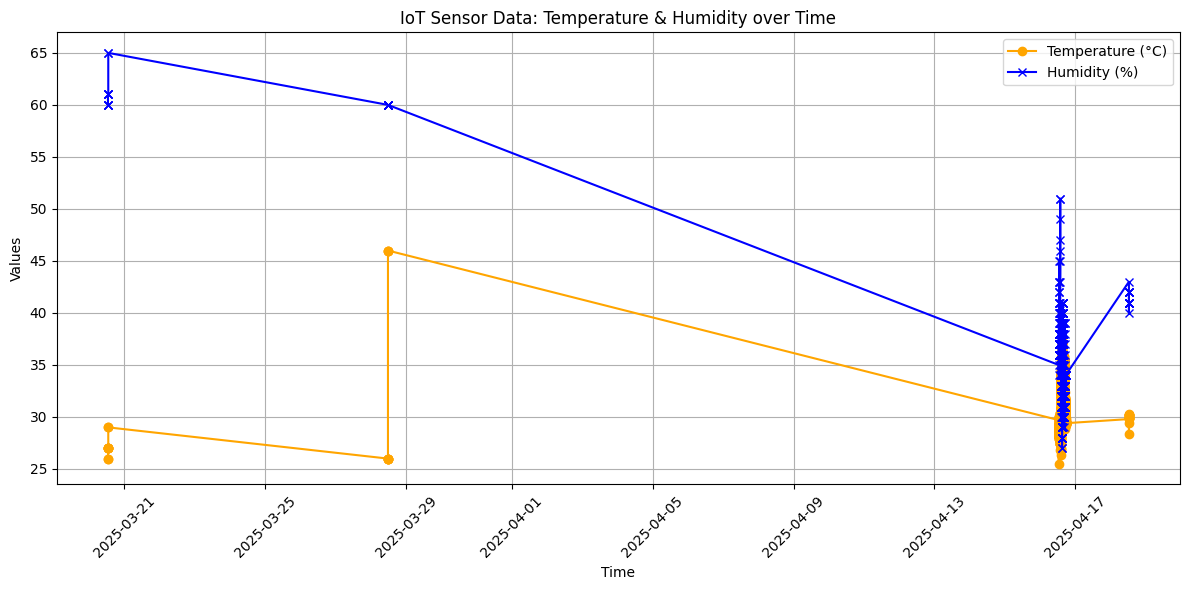

In [15]:
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime

url = "https://dollymaam.s3.us-east-1.amazonaws.com/iot_data2.json"

try:
    response = requests.get(url)
    response.raise_for_status()

    lines = response.text.strip().split('\n')
    data = [json.loads(line) for line in lines if line.strip()]

    timestamps = [datetime.fromtimestamp(d["timestamp"] / 1000) for d in data]
    temperatures = [d["temperature"] for d in data]
    humidities = [d["humidity"] for d in data]

    # Plotting
    plt.figure(figsize=(12, 6))

    plt.plot(timestamps, temperatures, label='Temperature (°C)', color='orange', marker='o')
    plt.plot(timestamps, humidities, label='Humidity (%)', color='blue', marker='x')

    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.title("IoT Sensor Data: Temperature & Humidity over Time")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)

    plt.show()

except requests.exceptions.RequestException as e:
    print("Request error:", e)
except json.JSONDecodeError as e:
    print("JSON parsing error:", e)
except Exception as e:
    print("Other error:", e)


In [20]:
pip install pandas matplotlib requests

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import json

# Fetch data from S3
url = "https://dollymaam.s3.us-east-1.amazonaws.com/iot_data2.json"

try:
    response = requests.get(url)
    response.raise_for_status()

    # Read raw text and split by newlines
    lines = response.text.strip().split('\n')
    
    # Parse each line as a JSON object
    data = [json.loads(line) for line in lines if line.strip()]

except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
    exit()
except json.JSONDecodeError as json_err:
    print(f"JSON decode error: {json_err}")
    exit()
except Exception as err:
    print(f"An error occurred: {err}")
    exit()

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert timestamp (milliseconds) to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

# Extract date for grouping
df['date'] = df['datetime'].dt.date

# Group data by date
grouped = df.groupby('date')

# Plot for each day
for date, group in grouped:
    plt.figure(figsize=(10, 6))
    
    # Create dual y-axes
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot temperature on primary y-axis
    ax1.plot(group['datetime'], group['temperature'], 'b-', label='Temperature (°C)')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Temperature (°C)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Create secondary y-axis for humidity
    ax2 = ax1.twinx()
    ax2.plot(group['datetime'], group['humidity'], 'r-', label='Humidity (%)')
    ax2.set_ylabel('Humidity (%)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    # Title and grid
    plt.title(f'Temperature and Humidity - {date}')
    ax1.grid(True)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save plot
    plt.savefig(f'iot_plot_{date}.png')
    plt.close()

print("Plots generated and saved as PNG files.")

Plots generated and saved as PNG files.


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

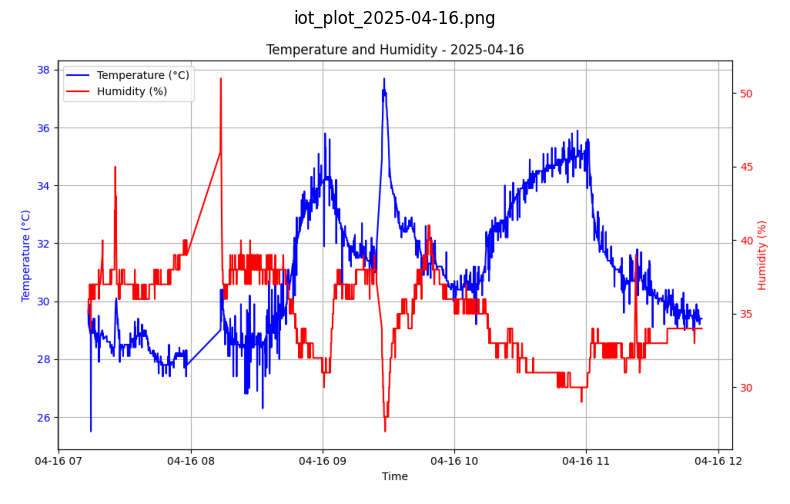

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Specify the image file name (replace with your date, e.g., 'iot_plot_2025-03-18.png')
image_file = 'iot_plot_2025-04-16.png'

# Check if the file exists
if os.path.exists(image_file):
    # Read and display the image
    img = mpimg.imread(image_file)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(image_file)
    plt.show()
else:
    print(f"Image file {image_file} not found.")

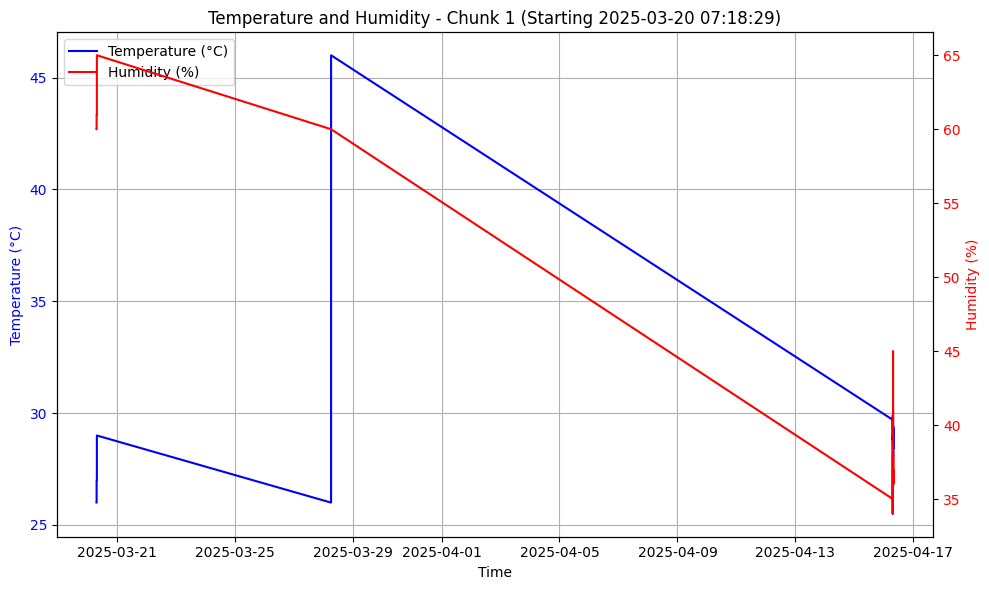

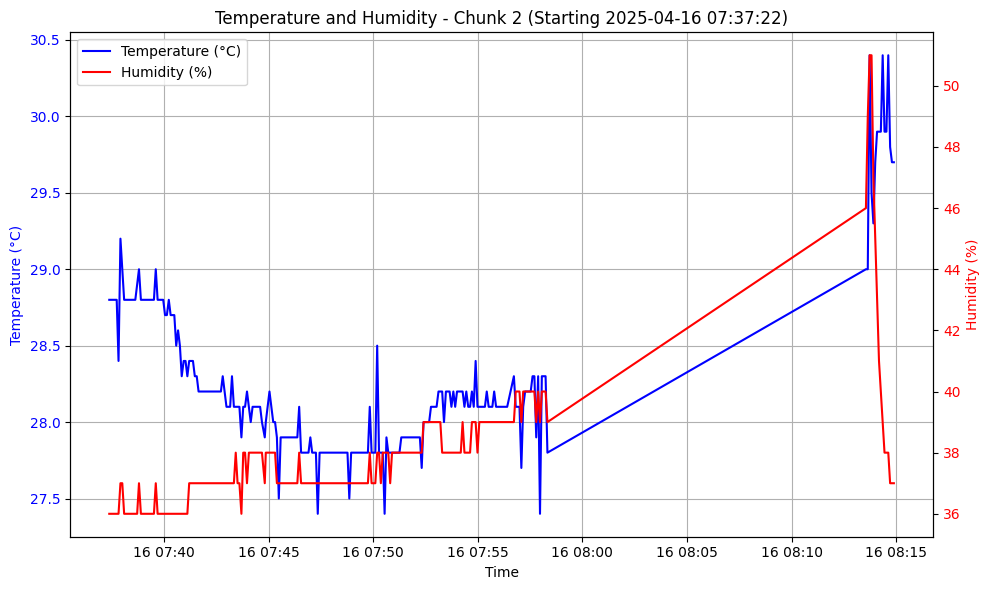

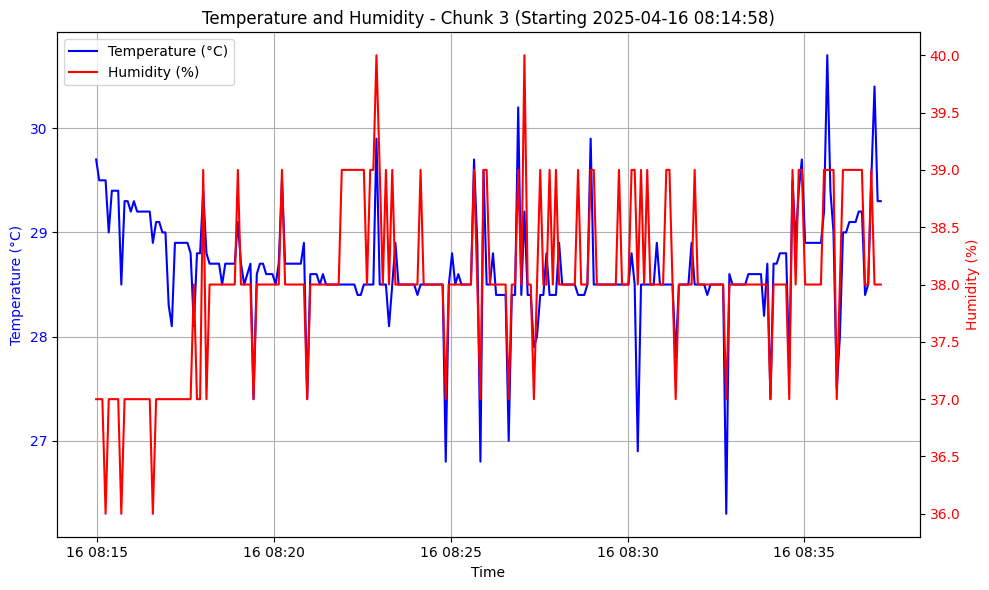

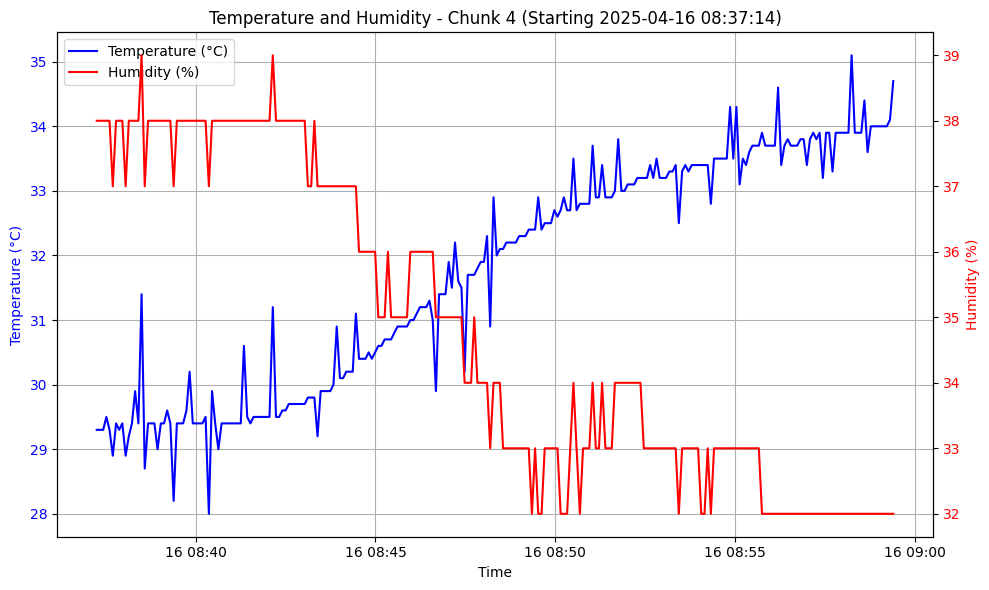

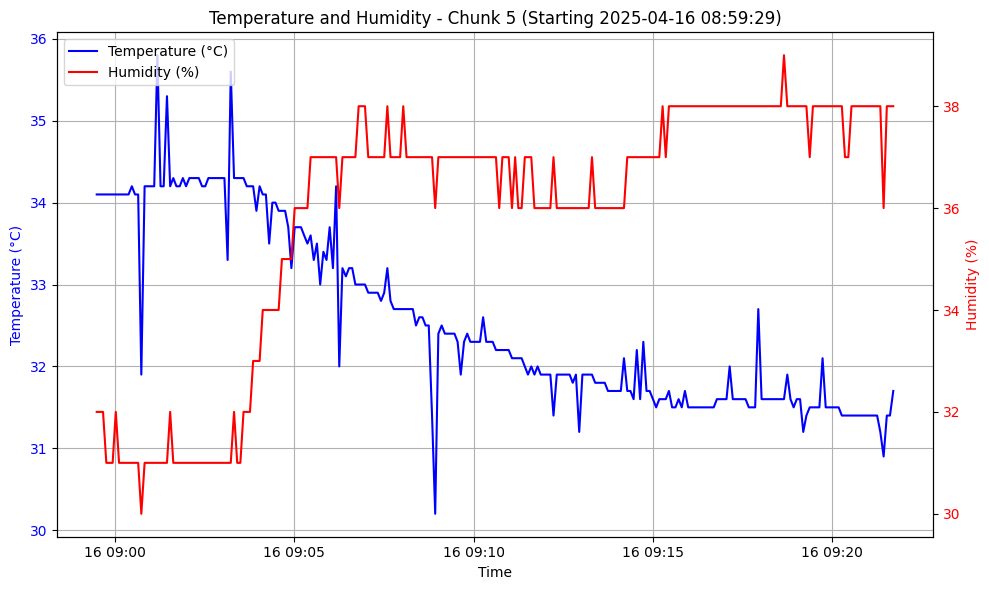

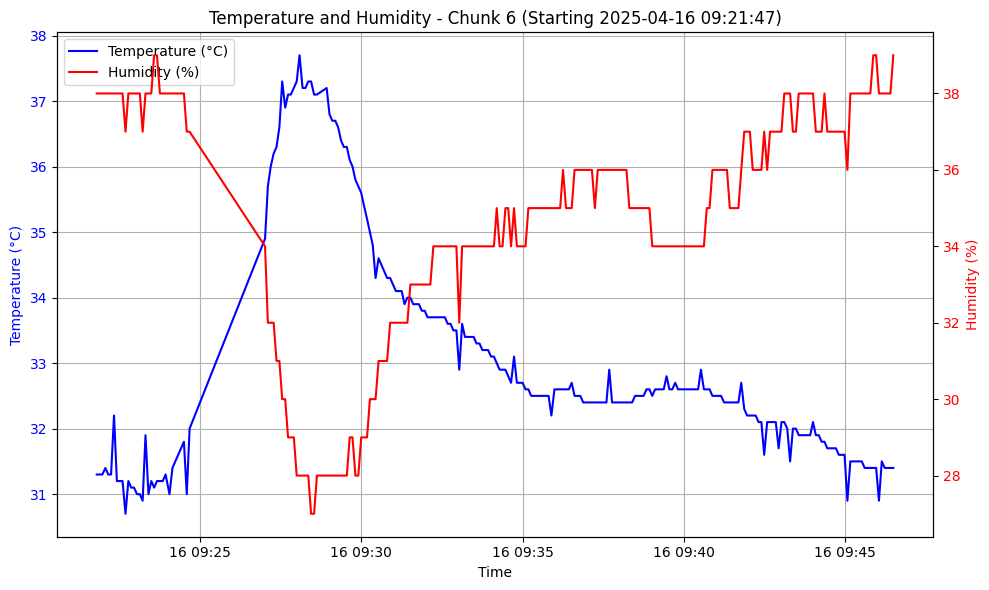

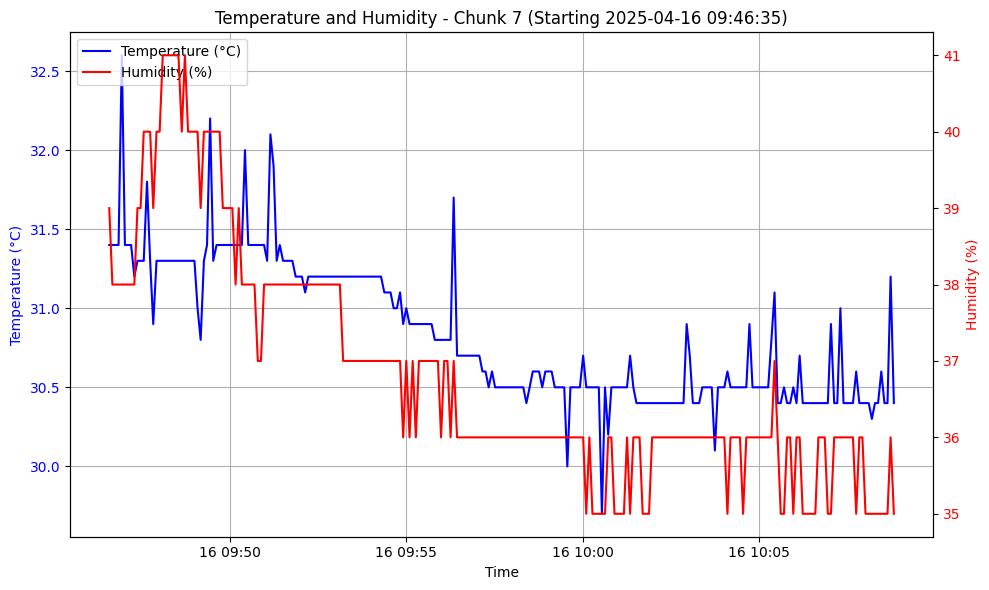

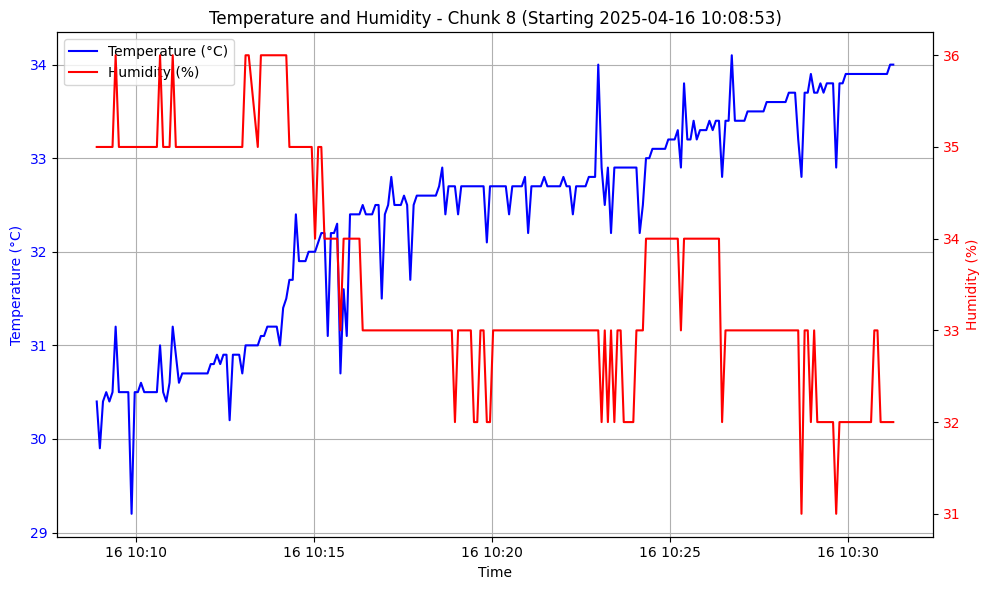

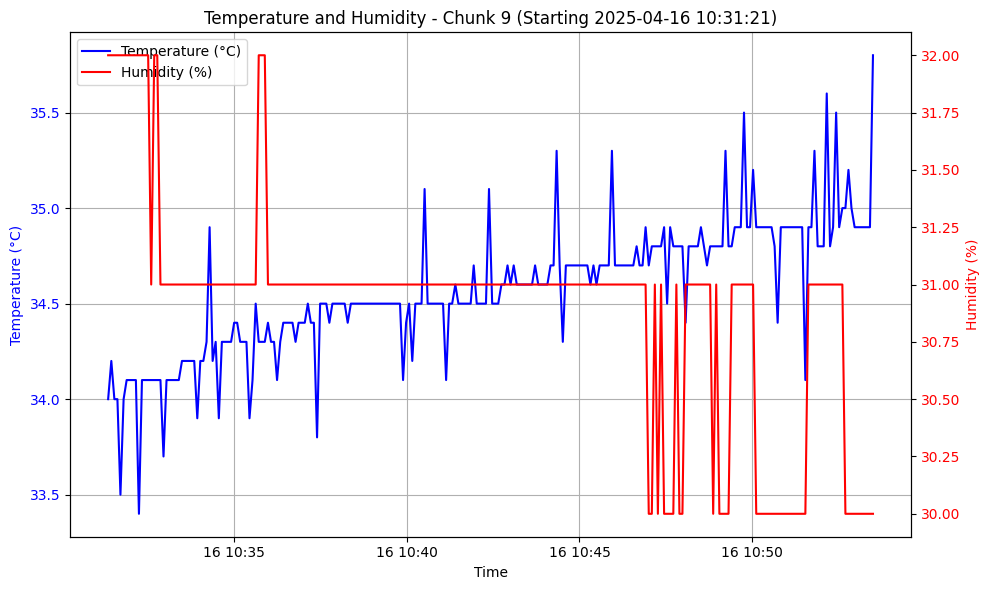

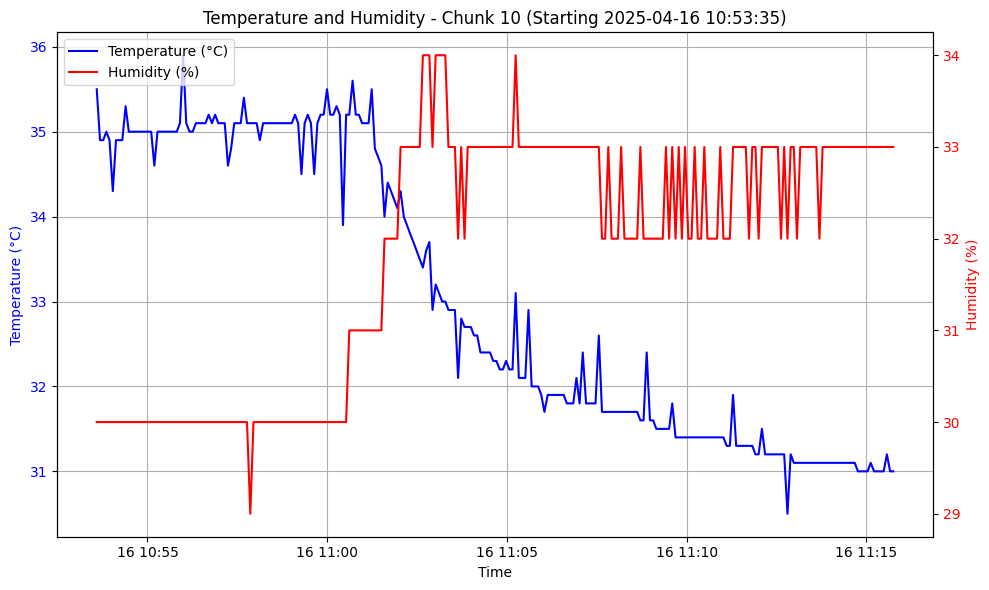

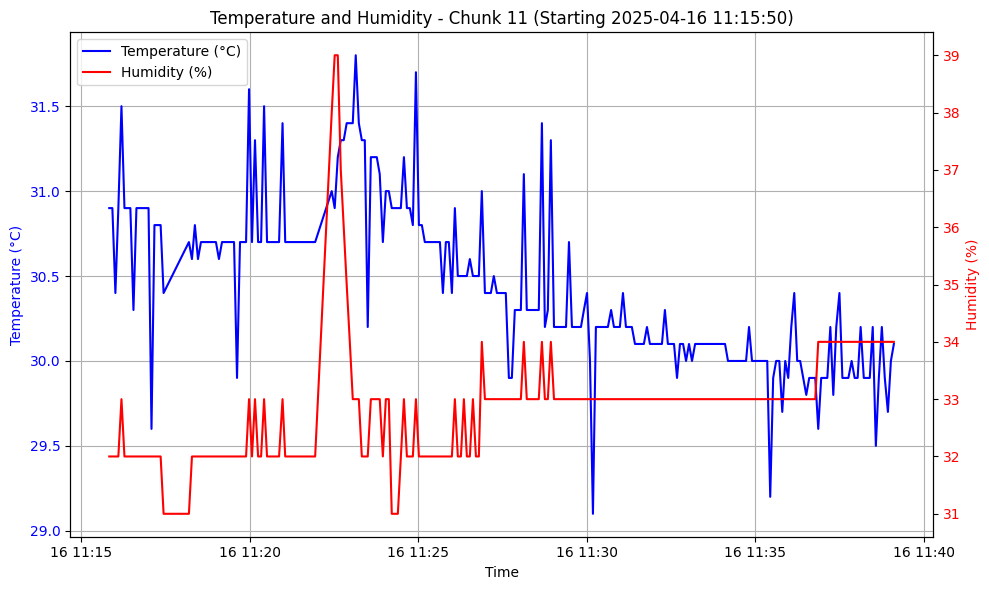

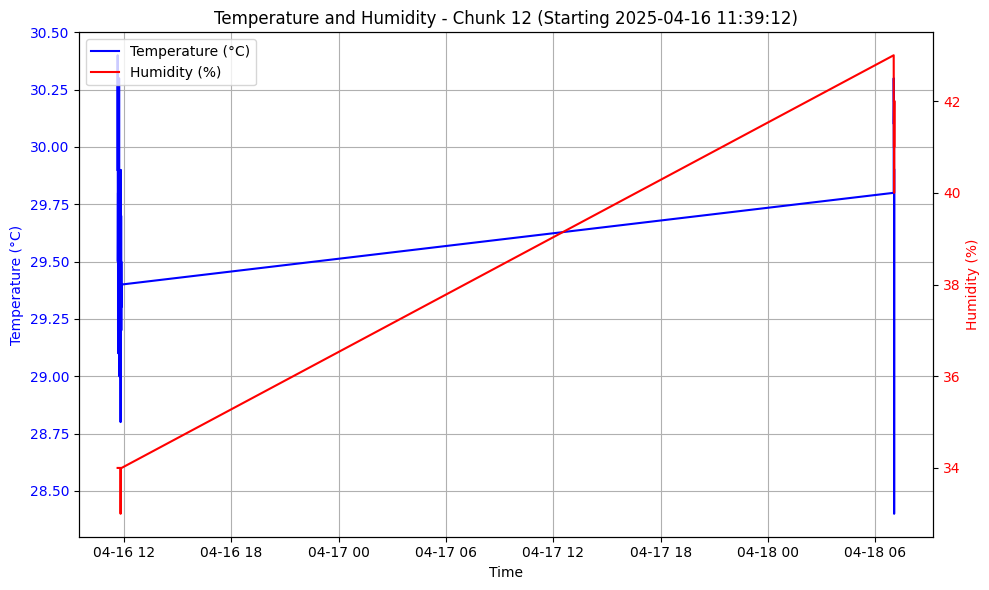

Plots generated, displayed, and saved for 12 chunks as PNG files.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

# Fetch data from S3
url = "https://dollymaam.s3.us-east-1.amazonaws.com/iot_data2.json"

try:
    response = requests.get(url)
    response.raise_for_status()

    # Read raw text and split by newlines
    lines = response.text.strip().split('\n')
    
    # Parse each line as a JSON object
    data = [json.loads(line) for line in lines if line.strip()]

except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
    exit()
except json.JSONDecodeError as json_err:
    print(f"JSON decode error: {json_err}")
    exit()
except Exception as err:
    print(f"An error occurred: {err}")
    exit()

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert timestamp (milliseconds) to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

# Define chunk size
chunk_size = 250

# Split data into chunks of 250
chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# Plot for each chunk
for idx, chunk in enumerate(chunks):
    if len(chunk) == 0:
        continue  # Skip empty chunks
    
    # Create dual y-axes
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot temperature on primary y-axis
    ax1.plot(chunk['datetime'], chunk['temperature'], 'b-', label='Temperature (°C)')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Temperature (°C)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Create secondary y-axis for humidity
    ax2 = ax1.twinx()
    ax2.plot(chunk['datetime'], chunk['humidity'], 'r-', label='Humidity (%)')
    ax2.set_ylabel('Humidity (%)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    # Title and grid
    start_time = chunk['datetime'].iloc[0].strftime('%Y-%m-%d %H:%M:%S')
    plt.title(f'Temperature and Humidity - Chunk {idx + 1} (Starting {start_time})')
    ax1.grid(True)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save plot
    plt.savefig(f'iot_plot_chunk_{idx + 1}.png')
    
    # Display plot
    plt.show()
    
    # Close the figure to free memory
    plt.close()

print(f"Plots generated, displayed, and saved for {len(chunks)} chunks as PNG files.")

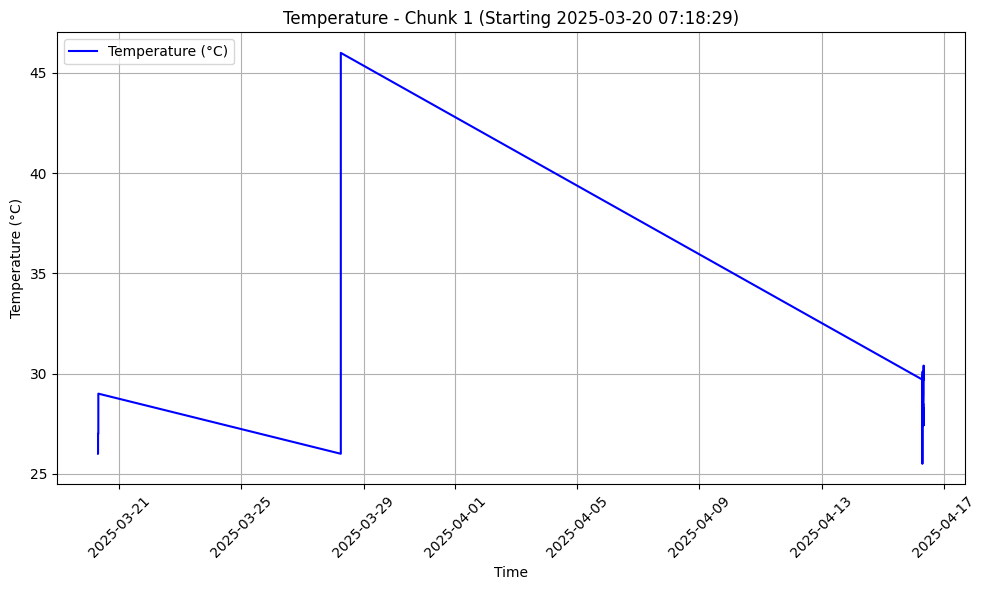

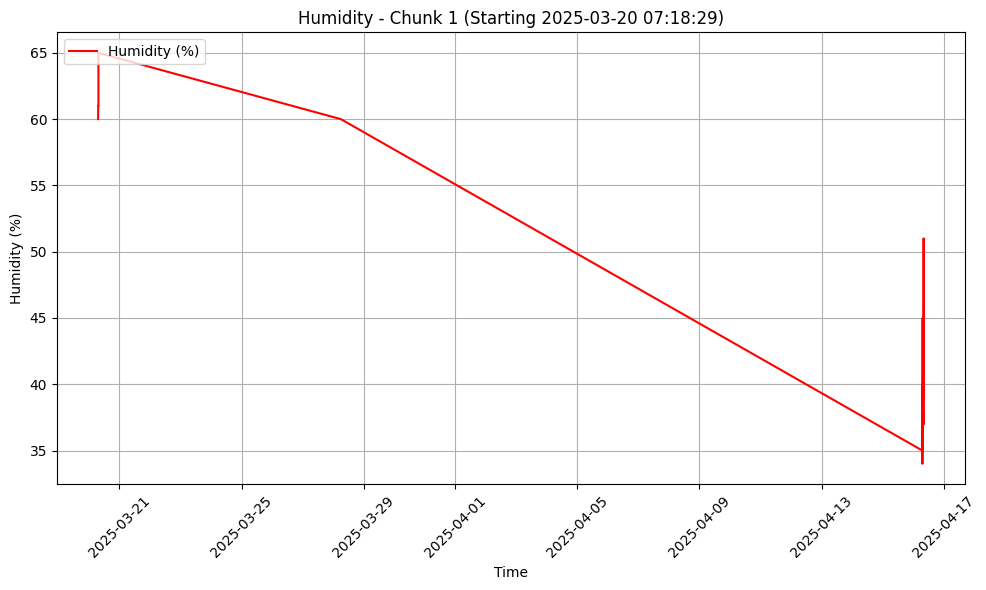

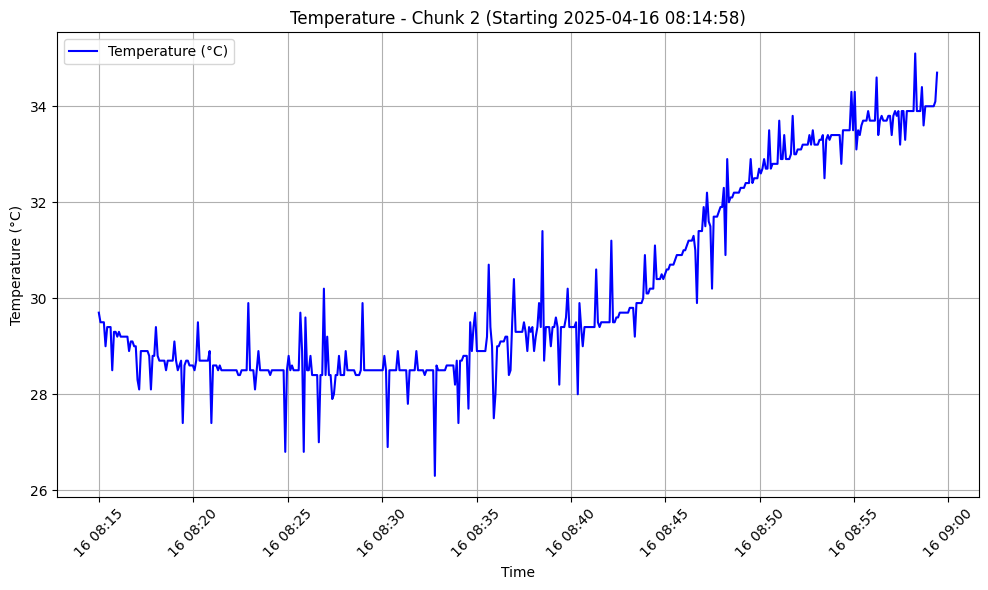

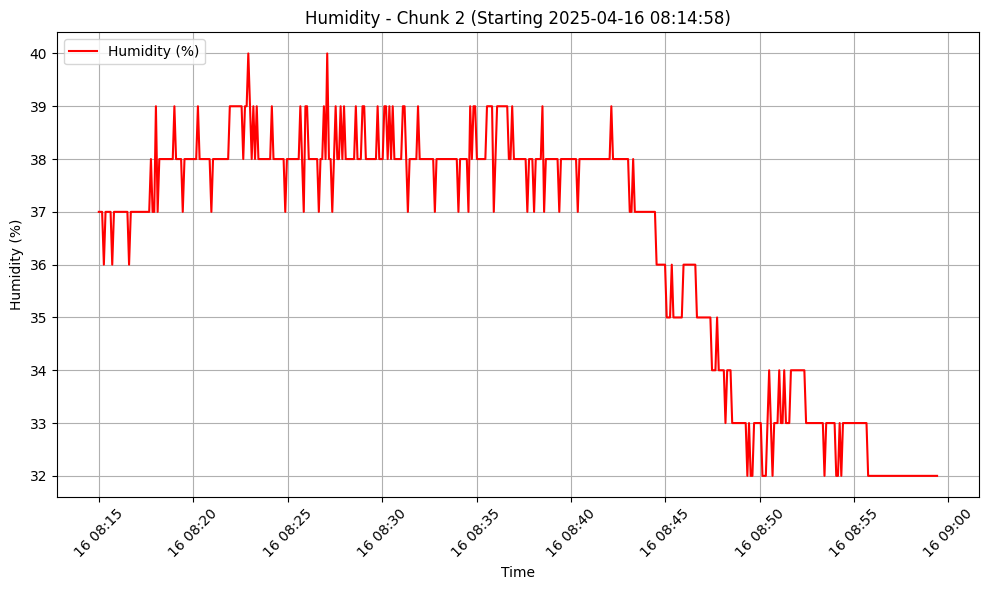

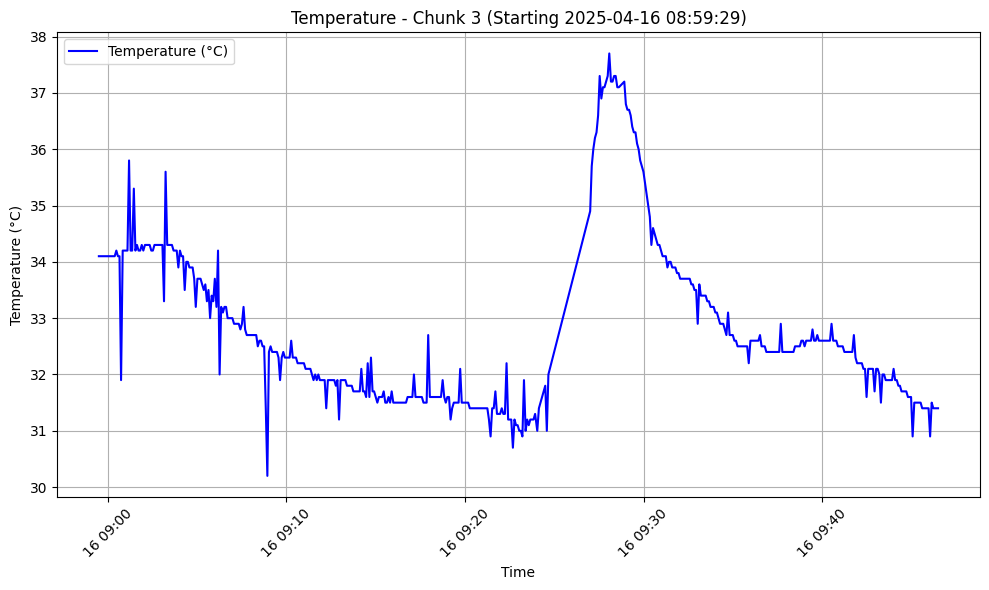

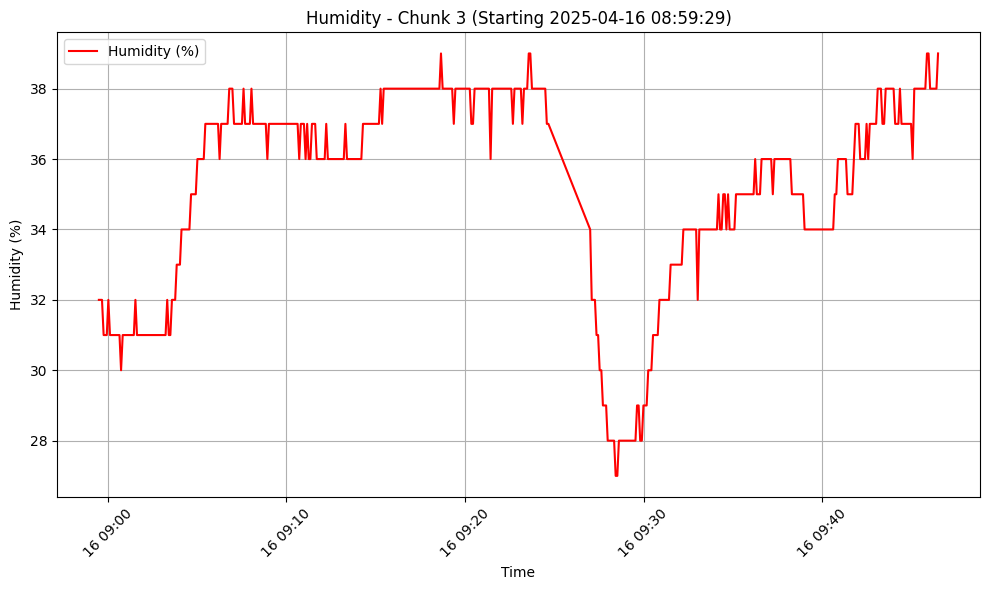

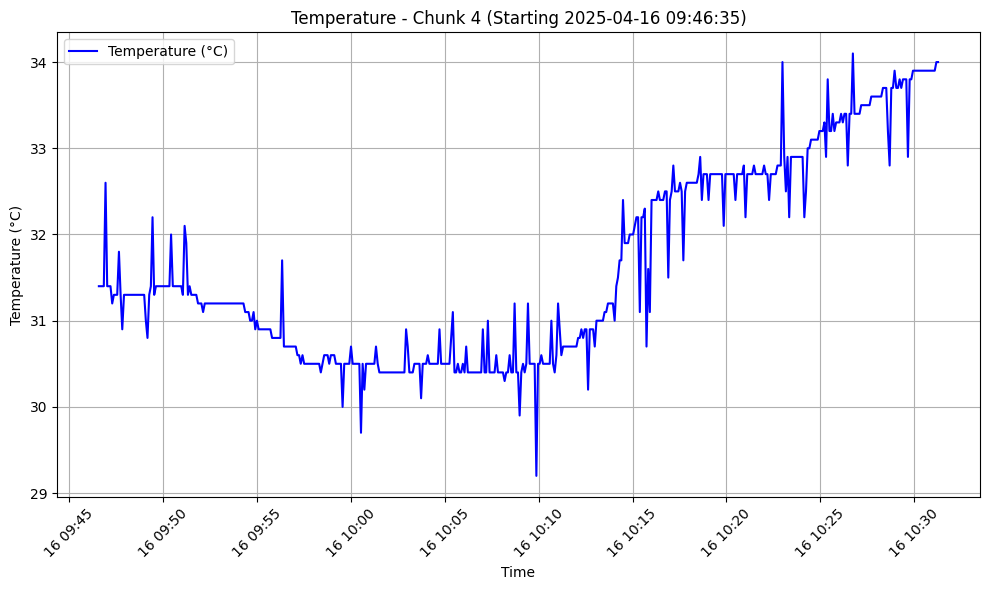

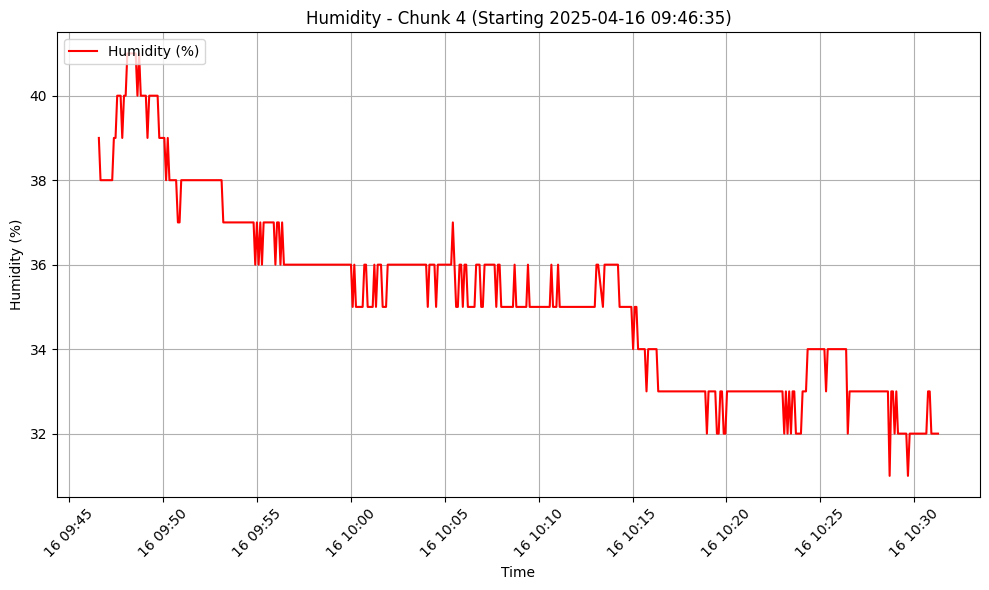

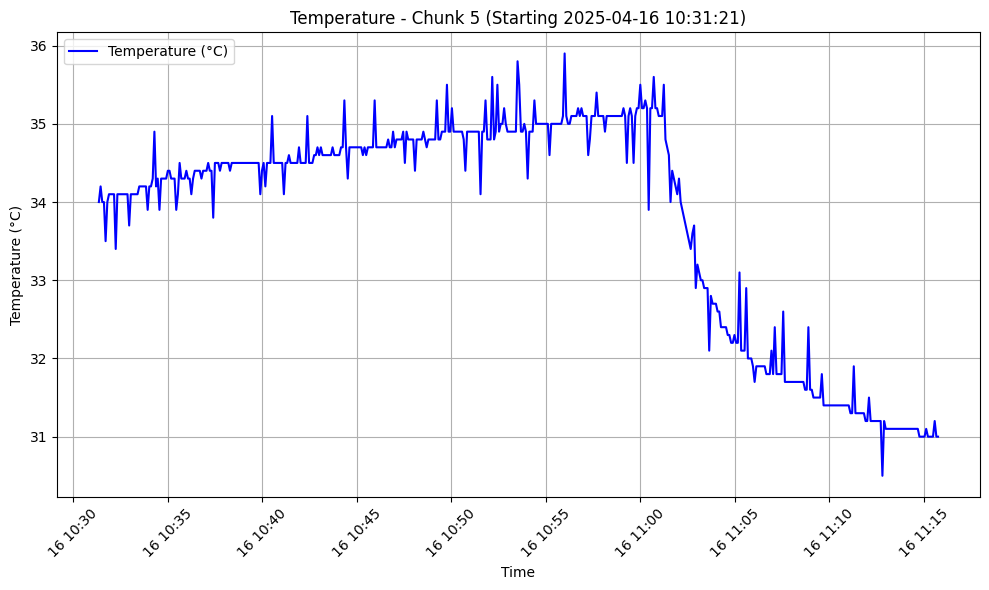

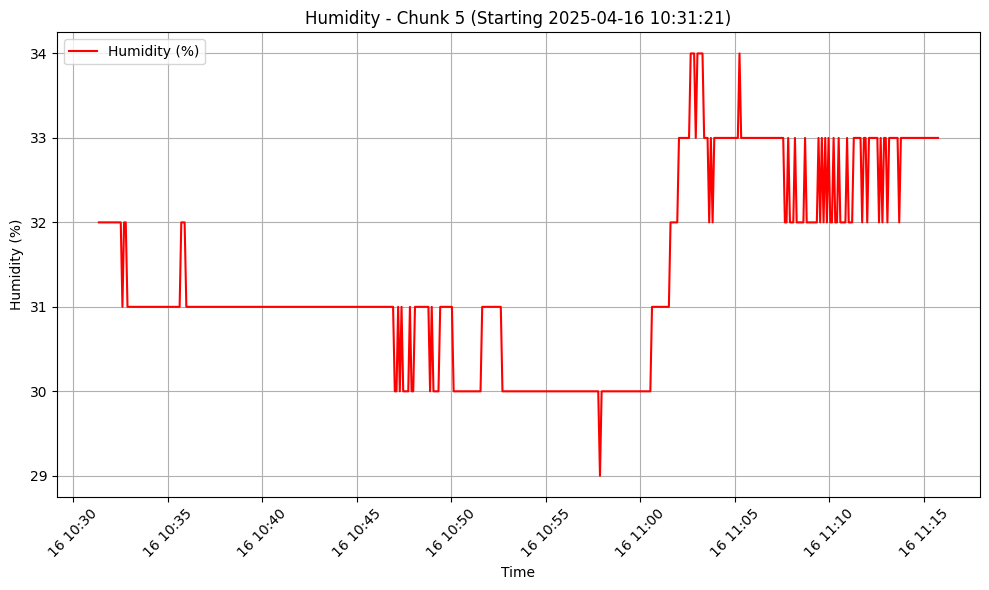

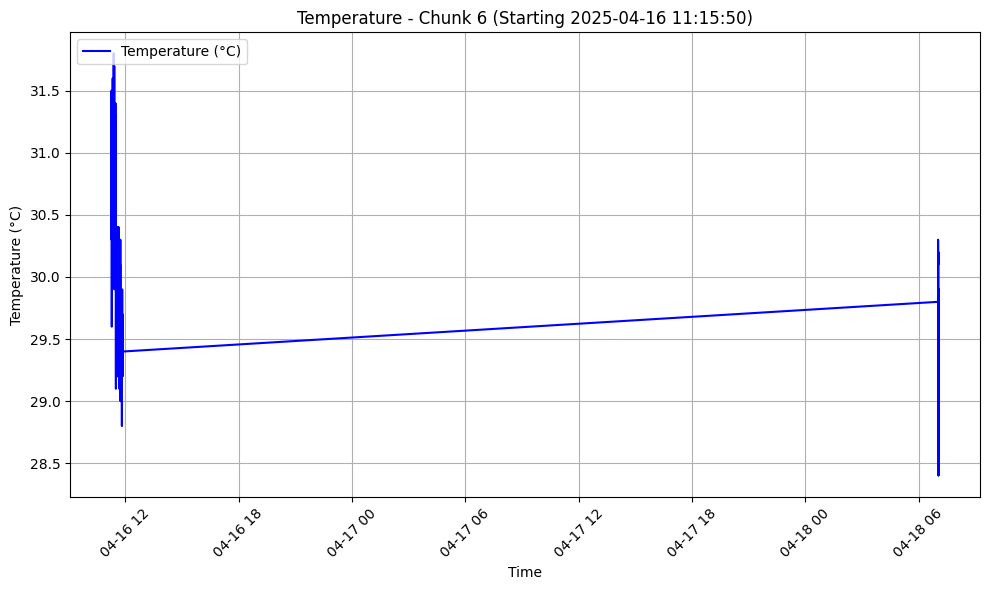

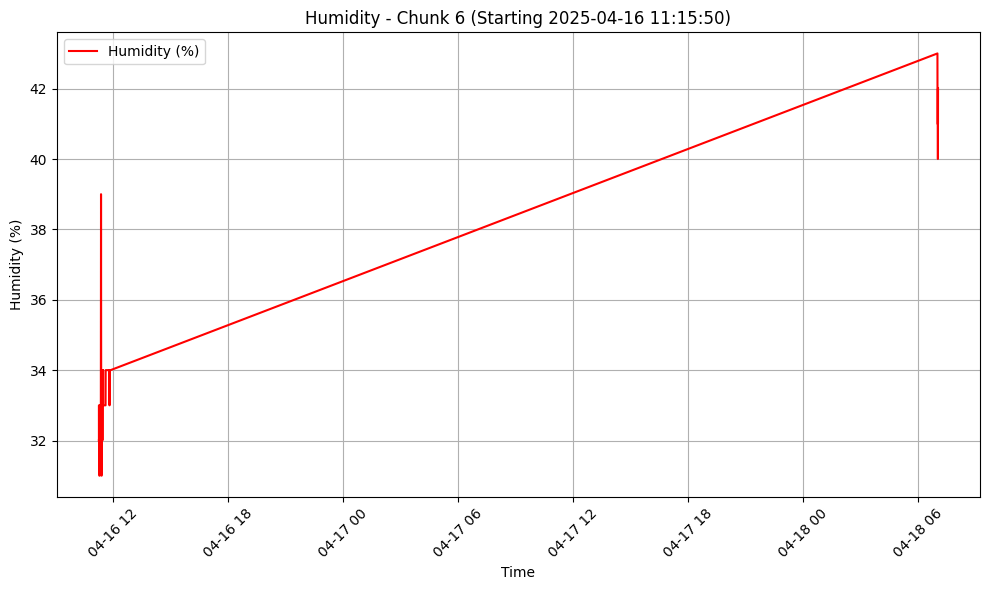

Separate temperature and humidity plots generated, displayed, and saved for 6 chunks as PNG files.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

# Fetch data from S3
url = "https://dollymaam.s3.us-east-1.amazonaws.com/iot_data2.json"

try:
    response = requests.get(url)
    response.raise_for_status()

    # Read raw text and split by newlines
    lines = response.text.strip().split('\n')
    
    # Parse each line as a JSON object
    data = [json.loads(line) for line in lines if line.strip()]

except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
    exit()
except json.JSONDecodeError as json_err:
    print(f"JSON decode error: {json_err}")
    exit()
except Exception as err:
    print(f"An error occurred: {err}")
    exit()

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert timestamp (milliseconds) to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

# Define chunk size
chunk_size = 500

# Split data into chunks of 500
chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# Plot for each chunk
for idx, chunk in enumerate(chunks):
    if len(chunk) == 0:
        continue  # Skip empty chunks

    # Plot Temperature
    plt.figure(figsize=(10, 6))
    plt.plot(chunk['datetime'], chunk['temperature'], 'b-', label='Temperature (°C)')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Temperature - Chunk {idx + 1} (Starting {chunk["datetime"].iloc[0].strftime("%Y-%m-%d %H:%M:%S")})')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    
    # Save and display temperature plot
    plt.savefig(f'iot_plot_temperature_chunk_{idx + 1}.png')
    plt.show()
    plt.close()

    # Plot Humidity
    plt.figure(figsize=(10, 6))
    plt.plot(chunk['datetime'], chunk['humidity'], 'r-', label='Humidity (%)')
    plt.xlabel('Time')
    plt.ylabel('Humidity (%)')
    plt.title(f'Humidity - Chunk {idx + 1} (Starting {chunk["datetime"].iloc[0].strftime("%Y-%m-%d %H:%M:%S")})')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    
    # Save and display humidity plot
    plt.savefig(f'iot_plot_humidity_chunk_{idx + 1}.png')
    plt.show()
    plt.close()

print(f"Separate temperature and humidity plots generated, displayed, and saved for {len(chunks)} chunks as PNG files.")